In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

import datetime

In [2]:
def get_dtime (string):
    """
    converts strings to datetime objects using datetime.strptime mostly just wrote this so I could .apply() it in pandas
    method chains
    
    takes (string) which is the full date of format mm/dd/yyyy (can't be 2 digit year)
    """
    return datetime.datetime.strptime(string, '%Y-%m-%d')#'%m/%d/%Y'

In [3]:
def open_hist (filepath):
    
    hist = pd.read_csv(filepath)
    
    hist['date'] = hist['date'].apply(get_dtime)
    
#     hist['st close'] = hist['st close'].apply(get_dtime)
#     hist['st open'] = hist['st open'].apply(get_dtime)
    
    return hist

In [4]:
def drop_autopay (hist):
    
    autopays = hist.loc[hist['desc'].str.contains('AUTOMATIC PAYMENT').fillna(False)].index
    
    hist = hist.loc[[u for u in hist.index if u not in autopays], :]
    
    return hist

In [5]:
hist = open_hist(r'C:\Users\geeze\Documents\finances\cc\cc_hist_tidy.csv')

In [6]:
hist_no_auto = drop_autopay(hist)

In [7]:
monthly = hist_no_auto.resample('M', on='date').sum()

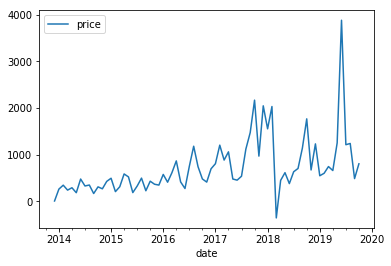

In [8]:
monthly.plot(y='price')

(0, 1500)

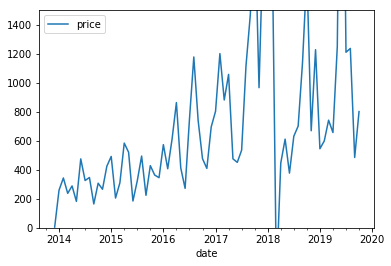

In [9]:
monthly.plot(y='price')

plt.ylim([0, 1500])

In [12]:
monthly.mean()

price    716.510986
dtype: float64